# <font color='red'> 1) intsaling the Programs

In [1]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library
# import statements
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.impute import KNNImputer
#import missingno as msno
import warnings
import scipy.stats as stats
import missingno as msno
%matplotlib inline
warnings.filterwarnings("ignore")

from scipy.stats import f_oneway

import numpy as np
from sklearn.impute import KNNImputer
from scipy import stats

def load_data(filename):
    df = pd.read_csv(filename)
    return df


In [2]:
pd.set_option("display.max_columns",60)

# <font color='red'> 2) input DATA

In [3]:
# https://data.seattle.gov/dataset/2015-Building-Energy-Benchmarking/h7rm-fz6m/data
df15 = pd.read_csv('2016-building-energy-benchmarking.csv')
df16= pd.read_csv('2015-building-energy-benchmarking.csv')

FileNotFoundError: [Errno 2] No such file or directory: '2016-building-energy-benchmarking.csv'

In [ ]:
print(df15.shape)
print(df16.shape)

In [4]:
data=df15
objectColumns = list(data.dtypes[data.dtypes == np.object].index)
numericColumns = list(data.dtypes[data.dtypes != np.object].index)
print("objectColumns",len(objectColumns))
print("numericColumns",len(numericColumns))
print(data.shape)

NameError: name 'df15' is not defined

In [22]:
data=df16
objectColumns = list(data.dtypes[data.dtypes == np.object].index)
numericColumns = list(data.dtypes[data.dtypes != np.object].index)
print("objectColumns",len(objectColumns))
print("numericColumns",len(numericColumns))
print(data.shape)

objectColumns 15
numericColumns 32
(3340, 47)


<AxesSubplot:>

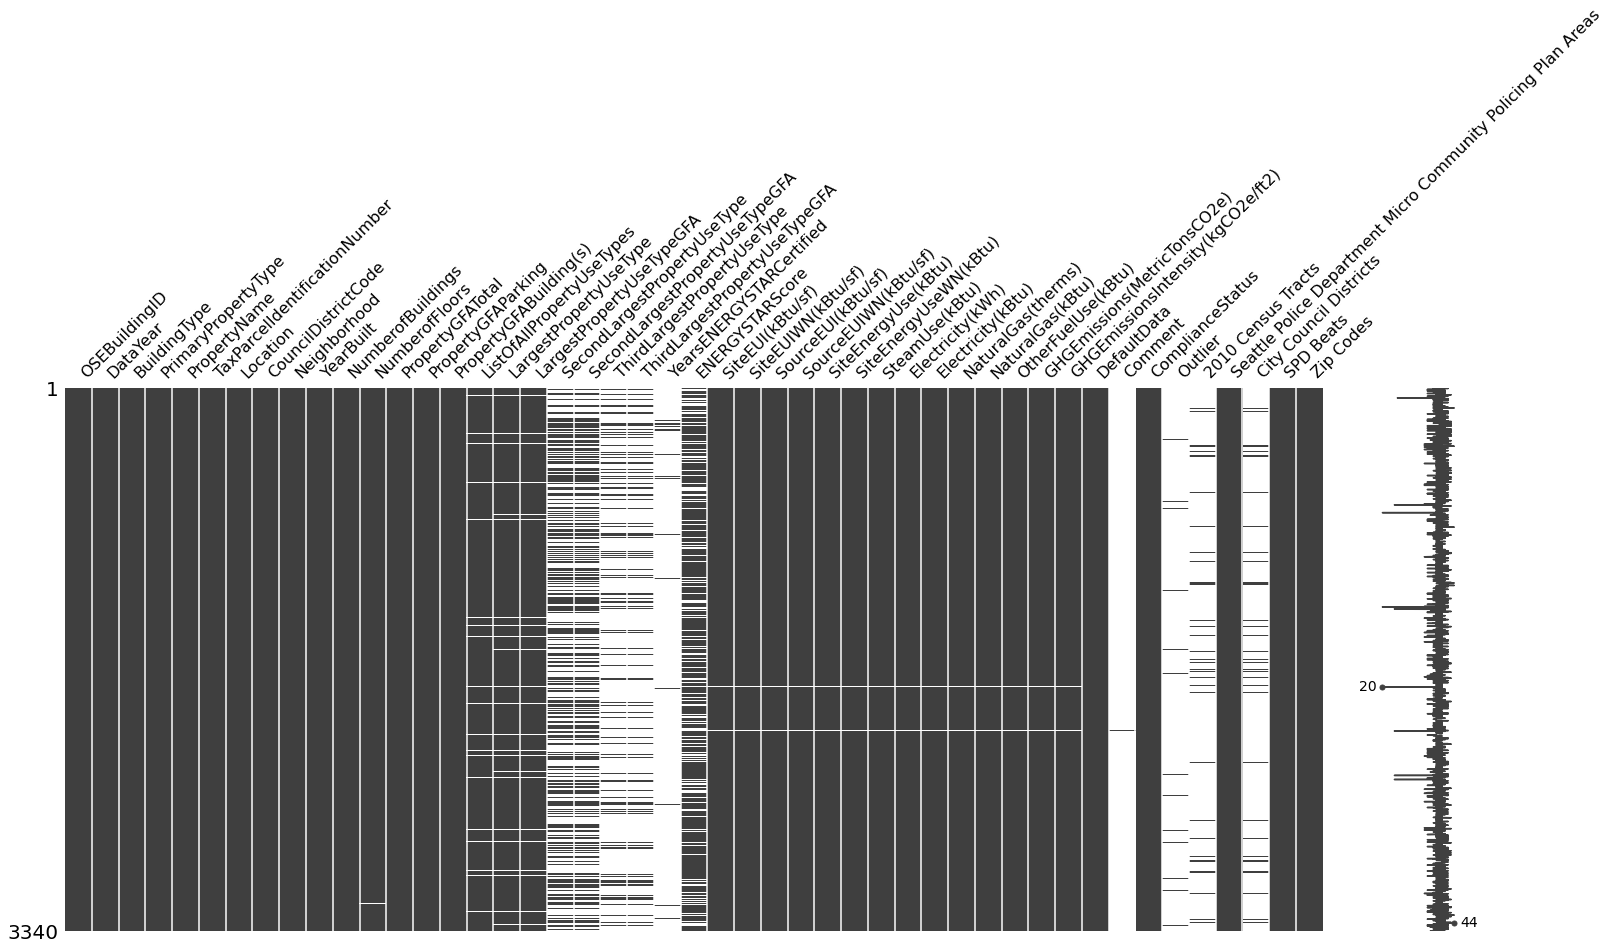

In [23]:
msno.matrix(df16)

In [24]:
df16.head(1)

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,Location,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),DefaultData,Comment,ComplianceStatus,Outlier,2010 Census Tracts,Seattle Police Department Micro Community Policing Plan Areas,City Council Districts,SPD Beats,Zip Codes
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,659000030,"{'latitude': '47.61219025', 'longitude': '-122...",7,DOWNTOWN,1927,1,12.0,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,65.0,78.9,80.3,173.5,175.1,6981428.0,7097539.0,2023032.0,1080307.0,3686160.0,12724.0,1272388.0,0.0,249.43,2.64,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081


<AxesSubplot:>

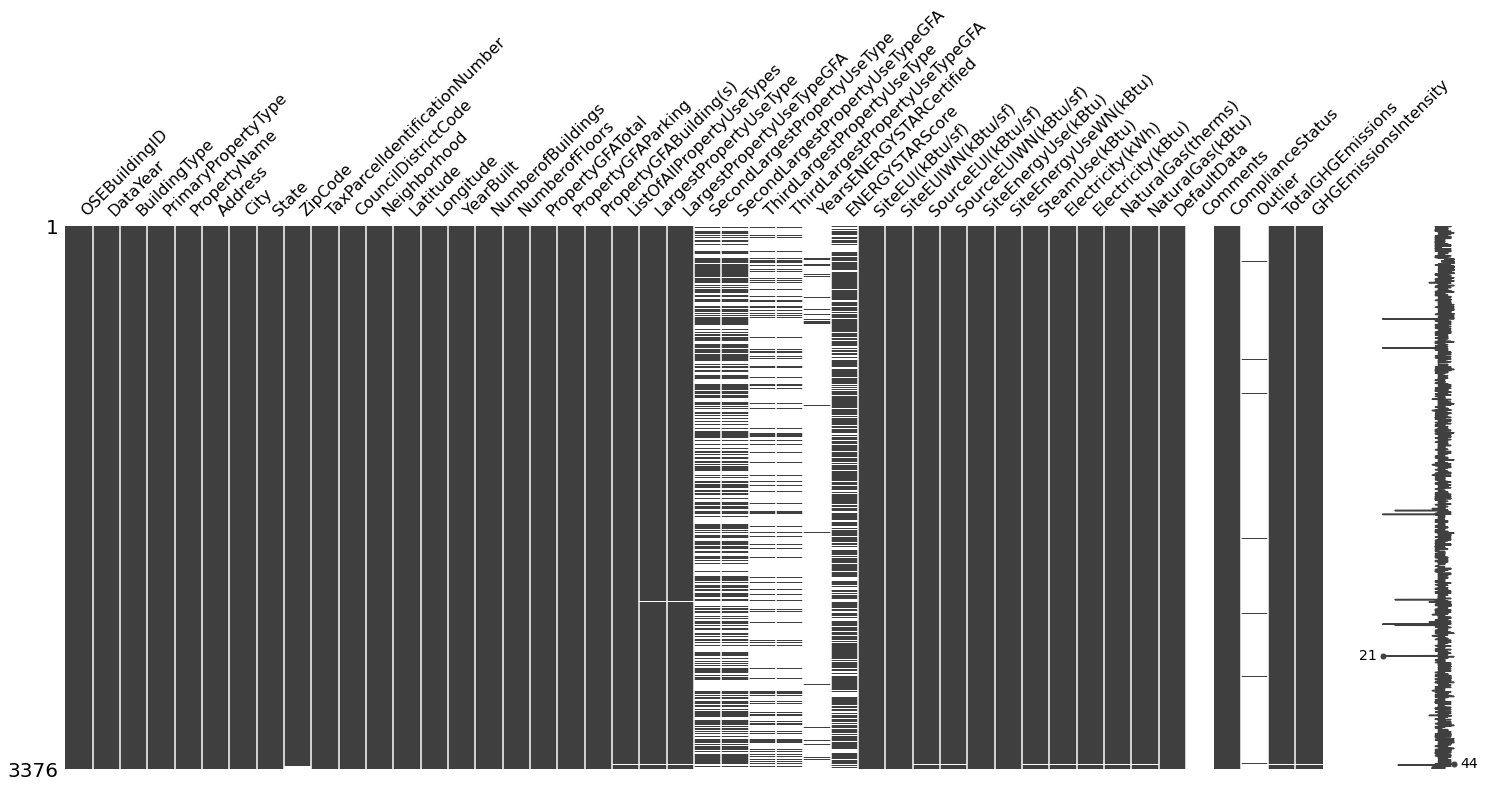

In [25]:
msno.matrix(df15)

# <font color='red'> 3) Arrange the Data 
#### <font color='red'> Remove useless columns. Rename title. Change casing . Change order of columns. compare the two columns. converting Objects to floats. And drop any useless data

In [26]:
df16['Location'][0]# showa the detail of the cell

'{\'latitude\': \'47.61219025\', \'longitude\': \'-122.33799744\', \'human_address\': \'{"address": "405 OLIVE WAY", "city": "SEATTLE", "state": "WA", "zip": "98101"}\'}'

In [27]:
# extrat the column location 

In [28]:
import ast # found it 

In [29]:
df16['Location'] = [ast.literal_eval(str(item)) for index, item in df16.Location.iteritems()]  
df16 = pd.concat([df16.drop(['Location'], axis=1), df16['Location'].apply(pd.Series)], axis=1)
df16['human_address'] = [ast.literal_eval(str(item)) for index, item in df16.human_address.iteritems()]
df16 = pd.concat([df16.drop(['human_address'], axis=1), df16['human_address'].apply(pd.Series)], axis=1)

In [30]:
df16.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),DefaultData,Comment,ComplianceStatus,Outlier,2010 Census Tracts,Seattle Police Department Micro Community Policing Plan Areas,City Council Districts,SPD Beats,Zip Codes,latitude,longitude,address,city,state,zip
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,659000030,7,DOWNTOWN,1927,1,12.0,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,65.0,78.9,80.3,173.5,175.1,6981428.0,7097539.0,2023032.0,1080307.0,3686160.0,12724.0,1272388.0,0.0,249.43,2.64,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081,47.61219025,-122.33799744,405 OLIVE WAY,SEATTLE,WA,98101
1,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,659000220,7,DOWNTOWN,1996,1,11.0,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,51.0,94.4,99.0,191.3,195.2,8354235.0,8765788.0,0.0,1144563.0,3905411.0,44490.0,4448985.0,0.0,263.51,2.38,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081,47.61310583,-122.33335756,724 PINE ST,SEATTLE,WA,98101
2,3,2015,NonResidential,Hotel,WESTIN HOTEL,659000475,7,DOWNTOWN,1969,1,41.0,961990,0,961990,"Hotel, Parking, Swimming Pool",Hotel,757243.0,Parking,100000.0,Swimming Pool,0.0,NaN,18.0,96.6,99.7,242.7,246.5,73130656.0,75506272.0,19660404.0,14583930.0,49762435.0,37099.0,3709900.0,0.0,2061.48,1.92,Yes,NaN,Compliant,NaN,NaN,56.0,NaN,31.0,18081,47.61334897,-122.33769944,1900 5TH AVE,SEATTLE,WA,98101
3,5,2015,NonResidential,Hotel,HOTEL MAX,659000640,7,DOWNTOWN,1926,1,10.0,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,1.0,460.4,462.5,636.3,643.2,28229320.0,28363444.0,23458518.0,811521.0,2769023.0,20019.0,2001894.0,0.0,1936.34,31.38,No,NaN,Compliant,High Outlier,NaN,56.0,NaN,31.0,18081,47.61421585,-122.33660889,620 STEWART ST,SEATTLE,WA,98101
4,8,2015,NonResidential,Hotel,WARWICK SEATTLE HOTEL,659000970,7,DOWNTOWN,1980,1,18.0,119890,12460,107430,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,67.0,120.1,122.1,228.8,227.1,14829099.0,15078243.0,0.0,1777841.0,6066245.0,87631.0,8763105.0,0.0,507.70,4.02,No,NaN,Compliant,NaN,NaN,56.0,NaN,31.0,19576,47.6137544,-122.3409238,401 LENORA ST,SEATTLE,WA,98121


In [31]:
import ast # found it 

In [32]:
def compare_colums(df15,df16):
    columns_1 = list(df15.columns) 
    columns_2 = list(df16.columns)
    same_columns=[]
    diff_columns_2=[]
    diff_columns_1=[]

    for col in columns_2:
        if col in columns_1:
            same_columns.append(col)
        else:
            diff_columns_2.append(col)
    for col in columns_1:
        if col not in columns_2:
            diff_columns_1.append(col)
    return diff_columns_1, diff_columns_2

In [34]:
diff_columns_2015, diff_columns_2016 = compare_colums(df15,df16)
print("list",diff_columns_2015)
print("diff_columns_2015:",len(diff_columns_2015))

list ['Address', 'City', 'State', 'ZipCode', 'Latitude', 'Longitude', 'Comments', 'TotalGHGEmissions', 'GHGEmissionsIntensity']
diff_columns_2015 9


In [35]:
print("list",diff_columns_2016)
print("diff_columns_2016:",len(diff_columns_2016))

list ['OtherFuelUse(kBtu)', 'GHGEmissions(MetricTonsCO2e)', 'GHGEmissionsIntensity(kgCO2e/ft2)', 'Comment', '2010 Census Tracts', 'Seattle Police Department Micro Community Policing Plan Areas', 'City Council Districts', 'SPD Beats', 'Zip Codes', 'latitude', 'longitude', 'address', 'city', 'state', 'zip']
diff_columns_2016: 15


In [14]:
df15 = df15.rename(columns={"GHGEmissionsIntensity":"GHGEmissionsIntensity_kgCO2e_ft2",
                            "TotalGHGEmissions":"GHGEmissions_MetricTonsCO2e",
                           })
df16 = df16.rename(columns={
                            "zip":"ZipCode",
                            "TotalGHGEmissions":"GHGEmissions_MetricTonsCO2e",
                            "latitude":"Latitude",
                            "longitude":"Longitude",
                            "City":"city",
                            "State":"state",
                            "Address":"address",
                            'Comment':"Comments",
                            "city": "City",
                            "state":"State",
                            "address":"Address",
                            })

In [15]:
df15=df15.drop(["Comments"], axis =1) 
df15=df15.drop(["DataYear","PropertyName","TaxParcelIdentificationNumber","CouncilDistrictCode",
                "ListOfAllPropertyUseTypes","YearsENERGYSTARCertified","DefaultData","ComplianceStatus",
                "NaturalGas(therms)","Electricity(kWh)","City","State","ZipCode","Address"
               ], axis =1) 

In [16]:
df16=df16.drop(['Comments','2010 Census Tracts','Seattle Police Department Micro Community Policing Plan Areas',
                'City Council Districts','SPD Beats','Zip Codes'], axis =1) 
df16=df16.drop(["DataYear","PropertyName","TaxParcelIdentificationNumber","CouncilDistrictCode",
                "ListOfAllPropertyUseTypes","YearsENERGYSTARCertified","DefaultData","ComplianceStatus",
                "NaturalGas(therms)","Electricity(kWh)"
               ], axis =1) 

In [17]:
df15_columns =df15.columns
df15.columns

Index(['OSEBuildingID', 'BuildingType', 'PrimaryPropertyType', 'Neighborhood',
       'Latitude', 'Longitude', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'LargestPropertyUseType',
       'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseType',
       'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseType',
       'ThirdLargestPropertyUseTypeGFA', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kBtu)', 'NaturalGas(kBtu)', 'Outlier',
       'GHGEmissions_MetricTonsCO2e', 'GHGEmissionsIntensity_kgCO2e_ft2'],
      dtype='object')

In [18]:
column_names= df15_columns

In [19]:
df16 = df16.reindex(columns=column_names)

In [20]:
pd.DataFrame([df15.dtypes, df16.dtypes])

,OSEBuildingID,BuildingType,PrimaryPropertyType,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),Outlier,GHGEmissions_MetricTonsCO2e,GHGEmissionsIntensity_kgCO2e_ft2
0,int64,object,object,object,float64,float64,int64,float64,int64,int64,int64,int64,object,float64,object,float64,object,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,object,float64,float64
1,int64,object,object,object,object,object,int64,int64,float64,int64,int64,int64,object,float64,object,float64,object,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,object,float64,float64


In [21]:
df15 = df15.applymap(lambda s: s.upper() if type(s) == str else s)
df16 = df16.applymap(lambda s: s.upper() if type(s) == str else s)

In [22]:
df16[["Latitude","Longitude","NumberofBuildings"]]=df16[["Latitude","Longitude","NumberofBuildings"]].astype(float)
df15[["NumberofBuildings","NumberofFloors"]]=df15[["NumberofBuildings","NumberofFloors"]].astype(float)

In [23]:
df15 = df15.applymap(lambda s: s.upper() if type(s) == str else s)
df16 = df16.applymap(lambda s: s.upper() if type(s) == str else s)

# <font color='red'> 4) rename all data ( due to facilitate the work )

In [24]:
print(df15.columns)

Index(['OSEBuildingID', 'BuildingType', 'PrimaryPropertyType', 'Neighborhood',
       'Latitude', 'Longitude', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'LargestPropertyUseType',
       'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseType',
       'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseType',
       'ThirdLargestPropertyUseTypeGFA', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kBtu)', 'NaturalGas(kBtu)', 'Outlier',
       'GHGEmissions_MetricTonsCO2e', 'GHGEmissionsIntensity_kgCO2e_ft2'],
      dtype='object')


In [25]:
df16 = df16.rename(columns={
                            'OSEBuildingID':"OSE_ID",  
                            'PrimaryPropertyType': "MAIN_BUILDING",  
                            'PropertyGFATotal':"Total_surface", 
                            'PropertyGFAParking':"GFA_Parking", 
                            'PropertyGFABuilding(s)':"GFA_Building",
                            'LargestPropertyUseType':"First", 
                            'LargestPropertyUseTypeGFA':"First_GFA",
                            'SecondLargestPropertyUseType':"Second", 
                            'SecondLargestPropertyUseTypeGFA':"Second_GFA",
                            'ThirdLargestPropertyUseType':"Third", 
                            'ThirdLargestPropertyUseTypeGFA':"Third_GFA",
                            'SiteEUI(kBtu/sf)':"Site_EUI_SF", 
                            'SiteEUIWN(kBtu/sf)':"Site_EUIWN_SF",
                            'SourceEUI(kBtu/sf)':"Source_EUI_SF", 
                            'SourceEUIWN(kBtu/sf)':"Source_EUIWN_SF", 
                            'SiteEnergyUse(kBtu)':"SiteEnergy_Use_total",
                            'SiteEnergyUseWN(kBtu)':"SiteEnergy_UseWN_total", 
                            'SteamUse(kBtu)':"SteamUse", 
                            'Electricity(kBtu)':"Electricity",
                            'NaturalGas(kBtu)':"Natural_Gas", 
                            'GHGEmissions_MetricTonsCO2e':"Emissions_CO2e",
                            'GHGEmissionsIntensity_kgCO2e_ft2':"Emissions_CO2e_FT"
                            })
df15 = df15.rename(columns={
                            'OSEBuildingID':"OSE_ID",  
                            'PrimaryPropertyType': "MAIN_BUILDING",  
                            'PropertyGFATotal':"Total_surface", 
                            'PropertyGFAParking':"GFA_Parking", 
                            'PropertyGFABuilding(s)':"GFA_Building",
                            'LargestPropertyUseType':"First", 
                            'LargestPropertyUseTypeGFA':"First_GFA",
                            'SecondLargestPropertyUseType':"Second", 
                            'SecondLargestPropertyUseTypeGFA':"Second_GFA",
                            'ThirdLargestPropertyUseType':"Third", 
                            'ThirdLargestPropertyUseTypeGFA':"Third_GFA",
                            'SiteEUI(kBtu/sf)':"Site_EUI_SF", 
                            'SiteEUIWN(kBtu/sf)':"Site_EUIWN_SF",
                            'SourceEUI(kBtu/sf)':"Source_EUI_SF", 
                            'SourceEUIWN(kBtu/sf)':"Source_EUIWN_SF", 
                            'SiteEnergyUse(kBtu)':"SiteEnergy_Use_total",
                            'SiteEnergyUseWN(kBtu)':"SiteEnergy_UseWN_total", 
                            'SteamUse(kBtu)':"SteamUse", 
                            'Electricity(kBtu)':"Electricity",
                            'NaturalGas(kBtu)':"Natural_Gas", 
                            'GHGEmissions_MetricTonsCO2e':"Emissions_CO2e",
                            'GHGEmissionsIntensity_kgCO2e_ft2':"Emissions_CO2e_FT"
                            })

In [26]:
data=df15
building_types = sorted(data['BuildingType'].unique())
primary_property_types = sorted(data['MAIN_BUILDING'].unique())
display(building_types)
display(primary_property_types)

['CAMPUS',
 'MULTIFAMILY HR (10+)',
 'MULTIFAMILY LR (1-4)',
 'MULTIFAMILY MR (5-9)',
 'NONRESIDENTIAL',
 'NONRESIDENTIAL COS',
 'NONRESIDENTIAL WA',
 'SPS-DISTRICT K-12']

['DISTRIBUTION CENTER',
 'HIGH-RISE MULTIFAMILY',
 'HOSPITAL',
 'HOTEL',
 'K-12 SCHOOL',
 'LABORATORY',
 'LARGE OFFICE',
 'LOW-RISE MULTIFAMILY',
 'MEDICAL OFFICE',
 'MID-RISE MULTIFAMILY',
 'MIXED USE PROPERTY',
 'OFFICE',
 'OTHER',
 'REFRIGERATED WAREHOUSE',
 'RESIDENCE HALL',
 'RESTAURANT',
 'RETAIL STORE',
 'SELF-STORAGE FACILITY',
 'SENIOR CARE COMMUNITY',
 'SMALL- AND MID-SIZED OFFICE',
 'SUPERMARKET / GROCERY STORE',
 'UNIVERSITY',
 'WAREHOUSE',
 'WORSHIP FACILITY']

In [27]:
df15['MAIN_BUILDING'] = df15['MAIN_BUILDING'].replace(['DISTRIBUTION CENTER\n','RESTAURANT\n',
                                                                   "SELF-STORAGE FACILITY\n"],
                                                                  ['DISTRIBUTION CENTER','RESTAURANT',"SELF-STORAGE FACILITY"])

df16['MAIN_BUILDING'] = df16['MAIN_BUILDING'].replace(['DISTRIBUTION CENTER\n','RESTAURANT\n',
                                                                   "SELF-STORAGE FACILITY\n"],
                                                                  ['DISTRIBUTION CENTER','RESTAURANT',"SELF-STORAGE FACILITY"])

In [28]:
df15 = df15[df15['BuildingType'].isin(['CAMPUS','NONRESIDENTIAL','NONRESIDENTIAL COS','SPS-DISTRICT K-12'])]
df16 = df16[df16['BuildingType'].isin(['CAMPUS','NONRESIDENTIAL','NONRESIDENTIAL COS','SPS-DISTRICT K-12'])]

In [29]:
print (df15.shape)
print (df16.shape)

(1667, 31)
(1650, 31)


# <font color='red'> 5) removing doubles

In [30]:
df15= df15.drop_duplicates()
df16= df16.drop_duplicates()

# <font color='red'> 6) convert any negative to positive

In [31]:
df15[['Electricity',"GFA_Building","SiteEnergy_Use_total","Emissions_CO2e_FT"]] = df15[['Electricity',"GFA_Building","SiteEnergy_Use_total","Emissions_CO2e_FT"]].abs() 
df16[['Electricity',"GFA_Building","SiteEnergy_Use_total","Emissions_CO2e_FT"]] = df16[['Electricity',"GFA_Building","SiteEnergy_Use_total","Emissions_CO2e_FT"]].abs() 

# <font color='red'> !!!!! only place to see the Raw data!!!!

In [32]:
df16.loc[df16["BuildingType"] == "SPS-DISTRICT K-12"]

,OSE_ID,BuildingType,MAIN_BUILDING,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,Total_surface,GFA_Parking,GFA_Building,First,First_GFA,Second,Second_GFA,Third,Third_GFA,ENERGYSTARScore,Site_EUI_SF,Site_EUIWN_SF,Source_EUI_SF,Source_EUIWN_SF,SiteEnergy_Use_total,SiteEnergy_UseWN_total,SteamUse,Electricity,Natural_Gas,Outlier,Emissions_CO2e,Emissions_CO2e_FT
22,28,SPS-DISTRICT K-12,K-12 SCHOOL,SOUTHEAST,47.545701,-122.268584,1961,1.0,2.0,56228,0,56228,K-12 SCHOOL,58320.0,NaN,NaN,NaN,NaN,96.0,25.1,29.6,59.2,63.9,1454222.0,1716043.0,0.0,911659.0,542600.0,NaN,NaN,NaN
28,34,SPS-DISTRICT K-12,K-12 SCHOOL,CENTRAL,47.623094,-122.305389,1955,1.0,1.0,126351,0,126351,K-12 SCHOOL,126351.0,NaN,NaN,NaN,NaN,57.0,49.7,64.4,84.2,102.4,6283226.0,8131874.0,0.0,1933106.0,4350200.0,NaN,NaN,NaN
30,36,SPS-DISTRICT K-12,K-12 SCHOOL,NORTH,47.710115,-122.293792,1949,1.0,2.0,160645,0,160645,K-12 SCHOOL,164229.0,NaN,NaN,NaN,NaN,80.0,38.9,50.9,62.6,77.2,6387710.0,8362498.0,0.0,1709681.0,4678100.0,NaN,NaN,NaN
31,37,SPS-DISTRICT K-12,K-12 SCHOOL,MAGNOLIA / QUEEN ANNE,47.633032,-122.352457,1989,1.0,2.0,51582,0,51582,K-12 SCHOOL,55166.0,NaN,NaN,NaN,NaN,94.0,26.7,30.5,83.8,95.8,1472548.0,1682521.0,0.0,1472609.0,0.0,NaN,NaN,NaN
36,50,SPS-DISTRICT K-12,K-12 SCHOOL,MAGNOLIA / QUEEN ANNE,47.657262,-122.390651,1990,1.0,2.0,54986,0,54986,K-12 SCHOOL,54986.0,NaN,NaN,NaN,NaN,91.0,30.1,33.5,80.3,91.0,1655612.0,1842702.0,0.0,1281965.0,373700.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2929,27365,SPS-DISTRICT K-12,K-12 SCHOOL,BALLARD,47.673449,-122.391774,1989,1.0,2.0,57298,0,57298,K-12 SCHOOL,60882.0,NaN,NaN,NaN,NaN,82.0,31.0,36.7,97.3,115.3,1886007.0,2235509.0,0.0,1886085.0,0.0,NaN,NaN,NaN
2979,27597,SPS-DISTRICT K-12,K-12 SCHOOL,NORTHWEST,47.714285,-122.329949,1956,1.0,1.0,45174,0,45174,K-12 SCHOOL,45174.0,NaN,NaN,NaN,NaN,88.0,41.2,51.6,74.7,87.6,1860084.0,2331607.0,0.0,680712.0,1179400.0,NaN,NaN,NaN
3075,27955,SPS-DISTRICT K-12,K-12 SCHOOL,EAST,47.640815,-122.305179,1925,1.0,2.0,27273,0,27273,K-12 SCHOOL,27273.0,NaN,NaN,NaN,NaN,90.0,43.5,57.3,80.2,100.3,1186682.0,1563244.0,0.0,450300.0,736400.0,NaN,NaN,NaN
3167,39332,SPS-DISTRICT K-12,K-12 SCHOOL,SOUTHEAST,47.524273,-122.271440,2009,1.0,2.0,138705,0,138705,K-12 SCHOOL,138705.0,NaN,NaN,NaN,NaN,88.0,33.6,38.6,77.8,83.1,4665069.0,5360718.0,0.0,2820186.0,1845000.0,NaN,NaN,NaN


In [33]:
#df17.loc[df17['Emissions_CO2e_FT'].idxmax()]

# <font color='red'> 7) Removing columns knowingly that are not import

In [34]:
df15=df15.drop(["Site_EUIWN_SF","Source_EUI_SF","Source_EUIWN_SF","SiteEnergy_UseWN_total"], axis =1) 
df16=df16.drop(["Site_EUIWN_SF","Source_EUI_SF","Source_EUIWN_SF","SiteEnergy_UseWN_total"], axis =1) 

# <font color='red'> 8) create 6 new virtual column

# <font color='purple'> 8.1) remove any 0 and replace to NAN

In [36]:
cols = ["Site_EUI_SF"]
df15 = df15.replace({'0':np.nan, 0:np.nan})
df16 = df16.replace({'0':np.nan, 0:np.nan})

In [37]:
#df15.column.fillna(0,inplace=True)

# <font color='Violet'> 8.2)  IF "GFA_Parking_V" 

# <font color='BLUE'> HOW TO MAKE THIS FUNCTION A LOOP 

In [38]:
### if in the "SecondLargestPropertyUseType" or "ThirdLargestPropertyUseType" there's 
#a swimming pool we need to fill the space usage  on "No energy usage space" 

def check_swimmimg(second ,third,second_area,third_area):
    if pd.isnull(second) and pd.isnull(third):
        return np.nan
    elif pd.isnull(second) and pd.isnull(third) == False:
        if third.upper() == ' PARKING':
            return third_area
        else:
            return 0
    elif pd.isnull(second) == False and pd.isnull(third):
        if second.upper() == 'PARKING':
            return second_area
        else:
            return 0
    elif pd.isnull(second) == False and pd.isnull(third) == False:
        if second.upper() == 'PARKING':
            return second_area
        elif third.upper() == 'PARKING':
            return third_area
        else:
            return 0
    else : 
        return 0
df15['GFA_Parking_V'] = df15.apply(lambda row: check_swimmimg(row.Second,
                                                                     row.Third,
                                                                     row.Second_GFA,
                                                                     row.Third_GFA),axis =1)
df16['GFA_Parking_V'] = df16.apply(lambda row: check_swimmimg(row.Second,
                                                                     row.Third,
                                                                     row.Second_GFA,
                                                                     row.Third_GFA),axis =1)

In [39]:
# i am building if row is bigger by 10% it will replace the amount with the Virtual data
def virtual_space(actual,virtual):
    if  np.isnan(actual):
        return virtual
    elif(actual < (virtual*0.9)):
        return virtual
    elif(actual > (virtual*0.9)):
        return virtual
    else:
        return actual

df15['GFA_Parking'] = df15.apply(lambda row: virtual_space(row['GFA_Parking'],row['GFA_Parking_V']),axis = 1)
df16['GFA_Parking'] = df16.apply(lambda row: virtual_space(row['GFA_Parking'],row['GFA_Parking_V']),axis = 1)

In [40]:
df15=df15.drop(["GFA_Parking_V"], axis =1)
df16=df16.drop(["GFA_Parking_V"], axis =1)

# <font color='Violet'> 8.3) GFA_Building_V	

In [42]:
df15['GFA_Building_V'] = df15.apply(
    lambda row: (row.Total_surface) - (row.GFA_Parking), axis=1)# - (row.Swimming_pool_V)
df16['GFA_Building_V'] = df16.apply(
    lambda row: (row.Total_surface) - (row.GFA_Parking), axis=1)# - (row.Swimming_pool_V)

In [43]:
# i am building if row is bigger by 10% it will replace the amount with the Virtual data
def virtual_space(actual,virtual):
    if  np.isnan(actual):
        return virtual
    elif(actual < (virtual*0.9)):
        return virtual
    elif(actual > (virtual*0.9)):
        return virtual
    else:
        return actual
    

df15['GFA_Building'] = df15.apply(lambda row: virtual_space(row['GFA_Building'],row['GFA_Building_V']),axis = 1)
df16['GFA_Building'] = df16.apply(lambda row: virtual_space(row['GFA_Building'],row['GFA_Building_V']),axis = 1)

In [44]:
df15=df15.drop(["GFA_Building_V","GFA_Parking"], axis =1)# "Swimming_pool_V",
df16=df16.drop(["GFA_Building_V","GFA_Parking"], axis =1)# "Swimming_pool_V",

# <font color='Violet'> 8.4) SiteEnergy_Use_total_V

In [45]:
df15['SiteEnergy_Use_total_V'] = df15.apply(
    lambda row: (row.GFA_Building) * (row.Site_EUI_SF), axis=1)
df16['SiteEnergy_Use_total_V'] = df16.apply(
    lambda row: (row.GFA_Building) * (row.Site_EUI_SF), axis=1)

In [46]:
# i am building if row is bigger by 10% it will replace the amount with the Virtual data
def virtual_space(Space ,virtual):
    if  np.isnan(Space):
        return virtual
    elif(Space < (virtual*0.9)):
        return virtual
    elif(Space > (virtual*0.9)):
        return virtual
    else:
        return Space
    

df15['SiteEnergy_Use_total'] = df15.apply(lambda row: virtual_space(row['SiteEnergy_Use_total'],row['SiteEnergy_Use_total_V']),axis = 1)
df16['SiteEnergy_Use_total'] = df16.apply(lambda row: virtual_space(row['SiteEnergy_Use_total'],row['SiteEnergy_Use_total_V']),axis = 1)

In [47]:
df15=df15.drop(["SiteEnergy_Use_total_V"], axis =1)
df16=df16.drop(["SiteEnergy_Use_total_V"], axis =1)

# <font color='Violet'> 8.5) Emissions_CO2e_V

In [48]:
df15[["SteamUse","Electricity","Natural_Gas"]]= df15[["SteamUse","Electricity","Natural_Gas"]].replace(np.nan, 0)
df16[["SteamUse","Electricity","Natural_Gas"]]= df16[["SteamUse","Electricity","Natural_Gas"]].replace(np.nan, 0)



In [49]:
df15.loc[df15['GFA_Building'] == 57428]

,OSE_ID,BuildingType,MAIN_BUILDING,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,Total_surface,GFA_Building,First,First_GFA,Second,Second_GFA,Third,Third_GFA,ENERGYSTARScore,Site_EUI_SF,SiteEnergy_Use_total,SteamUse,Electricity,Natural_Gas,Outlier,Emissions_CO2e,Emissions_CO2e_FT
45,58.0,NONRESIDENTIAL,OTHER,DOWNTOWN,47.61076,-122.33765,1920.0,1.0,2.0,57428.0,57428.0,OTHER - MALL,51747.0,"PERSONAL SERVICES (HEALTH/BEAUTY, DRY CLEANING...",5681.0,NaN,NaN,NaN,21.700001,1.246188e+06,0.0,714939.0,532423.0,NaN,33.26,0.58


In [50]:
# 12.95	143.45689	18.92833965

df15['Emissions_CO2e_V'] = df15.apply(
    lambda row: (((row.SteamUse)/12.95) + ((row.Electricity)/143.45689)+ ((row.Natural_Gas)/18.92833965))/1000, axis=1)
df16['Emissions_CO2e_V'] = df16.apply(
    lambda row: (((row.SteamUse)/12.95) + ((row.Electricity)/143.45689)+ ((row.Natural_Gas)/18.92833965))/1000, axis=1)

In [51]:
# i am building if row is bigger by 10% it will replace the amount with the Virtual data

df15['Emissions_CO2e'] = df15.apply(lambda row: virtual_space(row['Emissions_CO2e'],row['Emissions_CO2e_V']),axis = 1)
df16['Emissions_CO2e'] = df16.apply(lambda row: virtual_space(row['Emissions_CO2e'],row['Emissions_CO2e_V']),axis = 1)

In [52]:
df15=df15.drop(["Emissions_CO2e_V"], axis =1)
df16=df16.drop(["Emissions_CO2e_V"], axis =1)

# <font color='Violet'> 8.6) building

In [53]:
df15['NumberofBuildings'].fillna(0, inplace=True)
df15['NumberofBuildings'].replace(0, 1, inplace=True)
df15['NumberofFloors'].fillna(0, inplace=True)
df15['NumberofFloors'].replace(0, 1, inplace=True)

df16['NumberofBuildings'].fillna(0, inplace=True)
df16['NumberofBuildings'].replace(0, 1, inplace=True)
df16['NumberofFloors'].fillna(0, inplace=True)
df16['NumberofFloors'].replace(0, 1, inplace=True)

# <font color='red'> 9) remove unwanted columns now ( because we got what we need from it)

In [54]:
df15=df15.drop(['First', 'First_GFA','Second',
                'Second_GFA','Third', 'Third_GFA',"Total_surface","Outlier"
               ], axis =1) 

df16=df16.drop(['First', 'First_GFA','Second',
                'Second_GFA','Third', 'Third_GFA',"Total_surface","Outlier"
               ], axis =1) 

In [55]:
print(df15.columns)

Index(['OSE_ID', 'BuildingType', 'MAIN_BUILDING', 'Neighborhood', 'Latitude',
       'Longitude', 'YearBuilt', 'NumberofBuildings', 'NumberofFloors',
       'GFA_Building', 'ENERGYSTARScore', 'Site_EUI_SF',
       'SiteEnergy_Use_total', 'SteamUse', 'Electricity', 'Natural_Gas',
       'Emissions_CO2e', 'Emissions_CO2e_FT'],
      dtype='object')


# <font color='RED'> 10) Replace 0 to NAN than to Mean  ( same as in Nutrigrade)

# <font color='purple'> 10.1) remove any 0 and replace to NAN

In [56]:
cols = ["Site_EUI_SF"]
df15 = df15.replace({'0':np.nan, 0:np.nan})
df16 = df16.replace({'0':np.nan, 0:np.nan})

In [57]:
df=df15
Site_EUI_SF_mean = pd.DataFrame(df.groupby('MAIN_BUILDING')['Site_EUI_SF'].mean())

#df.groupby('nutriscore_grade')['nutriscore_grade'] == 'a'
def replace_null(x,mean):
    if np.isnan(x):
        return mean
    else:
        return x
a_mean = Site_EUI_SF_mean.loc['K-12 SCHOOL','Site_EUI_SF']
b_mean = Site_EUI_SF_mean.loc['OTHER','Site_EUI_SF']


df.loc[df['MAIN_BUILDING'] == 'K-12 SCHOOL','Site_EUI_SF']= df[df['MAIN_BUILDING'] == 'K-12 SCHOOL']['Site_EUI_SF'].apply(lambda x :replace_null(x,a_mean))

df.loc[df['MAIN_BUILDING'] == 'OTHER'      ,'Site_EUI_SF']= df[df['MAIN_BUILDING'] == 'OTHER']      ['Site_EUI_SF'].apply(lambda x :replace_null(x,b_mean))

# <font color='Violet'> 10.1) Emissions_CO2e_FT_V 

In [58]:
# 12.95	143.45689	18.92833965

df15['Emissions_CO2e_FT_V'] = df15.apply(
    lambda row: ((row.Emissions_CO2e)*1000)/ (row.GFA_Building) , axis=1)
df16['Emissions_CO2e_FT_V'] = df16.apply(
    lambda row: ((row.Emissions_CO2e)*1000)/ (row.GFA_Building) , axis=1)

In [59]:
# i am building if row is bigger by 10% it will replace the amount with the Virtual data
def virtual_space(Space ,virtual):
    if  np.isnan(Space):
        return virtual
    elif(Space < (virtual*0.9)):
        return virtual
    elif(Space > (virtual*0.9)):
        return virtual
    else:
        return Space
    

df15['Emissions_CO2e_FT'] = df15.apply(lambda row: virtual_space(row['Emissions_CO2e_FT'],row['Emissions_CO2e_FT_V']),axis = 1)
df16['Emissions_CO2e_FT'] = df16.apply(lambda row: virtual_space(row['Emissions_CO2e_FT'],row['Emissions_CO2e_FT_V']),axis = 1)

In [60]:
#df15['Emissions_CO2e_FT'] = df15.apply(lambda row: virtual_space(row['Emissions_CO2e_FT'],row['Emissions_CO2e_FT_V']),axis = 1)
#df16['Emissions_CO2e_FT'] = df16.apply(lambda row: virtual_space(row['Emissions_CO2e_FT'],row['Emissions_CO2e_FT_V']),axis = 1)

In [61]:
df15=df15.drop(["Emissions_CO2e_FT_V"], axis =1)
df16=df16.drop(["Emissions_CO2e_FT_V"], axis =1)

In [62]:
print (df15.shape)
print (df16.shape)

(1667, 18)
(1650, 18)


# <font color='red'>11) 90% full data keeping Rows

In [63]:
perc = 90 # Here N is 100
min_count =  int(((100-perc)/100)*df.shape[1] + 1)
df15 = df15.dropna( axis=0, thresh=min_count)

In [64]:
print (df15.shape)
print (df16.shape)

(1667, 18)
(1650, 18)


# <font color='red'>12) add the difference between 2016 from 2015 

In [65]:
def compare_colums(df15,df16):
    columns_1 = list(df15["OSE_ID"]) 
    columns_2 = list(df16["OSE_ID"])
    same_columns=[]
    diff_columns_2=[]
    diff_columns_1=[]

    for col in columns_2:
        if col in columns_1:
            same_columns.append(col)
        else:
            diff_columns_2.append(col)
    for col in columns_1:
        if col not in columns_2:
            diff_columns_1.append(col)
    return diff_columns_1, diff_columns_2



In [66]:
diff_columns_2015, diff_columns_2016 = compare_colums(df15,df16)
diff_columns_2016

[325.0,
 400.0,
 442.0,
 499.0,
 559.0,
 560.0,
 675.0,
 714.0,
 790.0,
 838.0,
 19656.0,
 19658.0,
 19780.0,
 21237.0,
 21471.0,
 21688.0,
 21796.0,
 22138.0,
 22441.0,
 22446.0,
 23163.0,
 23848.0,
 24408.0,
 24904.0,
 25042.0,
 25455.0,
 25654.0,
 27639.0,
 27829.0,
 49859.0]

# <font color='BLUE'> how to take diff_columns_2015 and put it a list so i can use it down without repeating 

In [67]:
df15_rest=df15[df15["OSE_ID"].isin([43,364, 365, 750, 20377, 20978, 21103, 23964, 24418, 49715, 49716, 49967, 49968, 49970, 49972, 49979, 
                     49980, 49983, 50026, 50031, 50035, 50037, 50039, 50045, 50054, 50062, 50068, 50069, 50070, 50081, 50094, 
                     50196, 50198, 50201, 50204, 50207, 50208, 50210, 50212, 50219, 50220, 50221, 50222, 50223, 50224, 50225,
                     50226])]

In [68]:
df16_rest=df16[df16["OSE_ID"].isin([325,400,442,499,559,560,675,714,790,838,19656,19658,19780,21237,21471,21688,
                                     21796,22138,22441,22446,23163,23848,24408,24904,25042,25455,25654,27639,27829,49859])]

In [69]:
df15= pd.concat([df16_rest, df15], axis=0)

# <font color='red'> 13) insert the difference into 2016

In [70]:
df17= pd.concat([df15_rest, df16], axis=0)

In [71]:
df15=df15.sort_values(by=['OSE_ID'])
df17=df17.sort_values(by=['OSE_ID'])

In [72]:
df15 = df15.set_index('OSE_ID')
df17 = df17.set_index('OSE_ID')

In [73]:
df17= df17.fillna(df15)

In [74]:
df17.reset_index(level=0, inplace=True)


In [75]:
df15.reset_index(level=0, inplace=True)

In [76]:
df16.reset_index(level=0, inplace=True)

# <font color='red'> 14) Filling NAN with KNN
### <font color='Violet'> Solution Nutri grade food

In [77]:
dfKNN=df17.drop(["SteamUse","BuildingType","MAIN_BUILDING","Neighborhood"], axis =1)
#num_cols = df15a.select_dtypes(exclude = 'O').columns
dfKNN=dfKNN.dropna( axis=0)
dfKNN.isna().sum().sort_values(ascending=False)

OSE_ID                  0
Latitude                0
Longitude               0
YearBuilt               0
NumberofBuildings       0
NumberofFloors          0
GFA_Building            0
ENERGYSTARScore         0
Site_EUI_SF             0
SiteEnergy_Use_total    0
Electricity             0
Natural_Gas             0
Emissions_CO2e          0
Emissions_CO2e_FT       0
dtype: int64

In [78]:
data=dfKNN

In [79]:
X = data[data.columns[:-1]].values #[:-1] c'est quoi
y = data['ENERGYSTARScore'].values

In [80]:
y_class = np.where(y<50, 0, 1)

In [81]:
from sklearn import model_selection
X_train, X_test, y_train, y_test = \
	model_selection.train_test_split(X, y_class,
                                	test_size=0.3 # 30% des données dans le jeu de test
                                	)

In [82]:
from sklearn import preprocessing
std_scale = preprocessing.StandardScaler().fit(X_train)
X_train_std = std_scale.transform(X_train)
X_test_std = std_scale.transform(X_test)

In [83]:
from sklearn import neighbors, metrics

# Fixer les valeurs des hyperparamètres à tester
param_grid = {'n_neighbors':[3, 5, 7, 9, 11, 13, 15]}

# Choisir un score à optimiser, ici l'accuracy (proportion de prédictions correctes)
score = 'accuracy'

# Créer un classifieur kNN avec recherche d'hyperparamètre par validation croisée
clf = model_selection.GridSearchCV(
    neighbors.KNeighborsClassifier(), # un classifieur kNN
    param_grid,     # hyperparamètres à tester
    cv=5,           # nombre de folds de validation croisée
    scoring=score   # score à optimiser
)

# Optimiser ce classifieur sur le jeu d'entraînement
clf.fit(X_train_std, y_train)

# Afficher le(s) hyperparamètre(s) optimaux
print("Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:")
print(clf.best_params_)

# Afficher les performances correspondantes
print("Résultats de la validation croisée :")
for mean, std, params in zip(
        clf.cv_results_['mean_test_score'], # score moyen
        clf.cv_results_['std_test_score'],  # écart-type du score
        clf.cv_results_['params']           # valeur de l'hyperparamètre
    ):

    print("{} = {:.3f} (+/-{:.03f}) for {}".format(
        score,
        mean,
        std*2,
        params
    ) )


Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:
{'n_neighbors': 7}
Résultats de la validation croisée :
accuracy = 0.933 (+/-0.034) for {'n_neighbors': 3}
accuracy = 0.937 (+/-0.007) for {'n_neighbors': 5}
accuracy = 0.942 (+/-0.018) for {'n_neighbors': 7}
accuracy = 0.933 (+/-0.029) for {'n_neighbors': 9}
accuracy = 0.935 (+/-0.026) for {'n_neighbors': 11}
accuracy = 0.939 (+/-0.019) for {'n_neighbors': 13}
accuracy = 0.932 (+/-0.017) for {'n_neighbors': 15}


In [84]:
y_pred = clf.predict(X_test_std)
print("\nSur le jeu de test : {:.3f}".format(metrics.accuracy_score(y_test, y_pred)))


Sur le jeu de test : 0.951


Text(0, 0.5, 'Sensibilite')

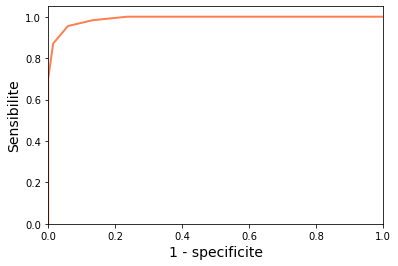

In [85]:
y_pred_proba = clf.predict_proba(X_test_std)[:, 1] # c'est quoi [:,1]
[fpr, tpr, thr] = metrics.roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, color='coral', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - specificite', fontsize=14)
plt.ylabel('Sensibilite', fontsize=14)

In [86]:
print(metrics.auc(fpr, tpr))

0.9898222000664674


In [87]:
# indice du premier seuil pour lequel
# la sensibilité est supérieure à 0.95
idx = np.min(np.where(tpr > 0.95)) 

print("Sensibilité : {:.2f}".format(tpr[idx]))
print("Spécificité : {:.2f}".format(1-fpr[idx]))
print("Seuil : {:.2f}".format(thr[idx]))

Sensibilité : 0.95
Spécificité : 0.94
Seuil : 0.71


In [88]:
import numpy as np
from sklearn.impute import KNNImputer

In [89]:
print(clf.best_params_)

{'n_neighbors': 7}


In [90]:
df17KNN=df17.drop(["BuildingType", "MAIN_BUILDING","Neighborhood"], axis = 1)

In [91]:
df=df17KNN
imputer=KNNImputer(n_neighbors=7)
df_KNN =imputer.fit_transform(df)
df_KNN

array([[ 1.00000000e+00,  4.76121902e+01, -1.22337997e+02, ...,
         1.27238800e+06,  2.49135254e+02,  2.81718857e+00],
       [ 2.00000000e+00,  4.76131058e+01, -1.22333358e+02, ...,
         4.44898500e+06,  2.62267181e+02,  2.96340400e+00],
       [ 3.00000000e+00,  4.76133490e+01, -1.22337699e+02, ...,
         3.70990000e+06,  2.06105579e+03,  2.39104374e+00],
       ...,
       [ 5.02240000e+04,  4.76364400e+01, -1.22357840e+02, ...,
         3.97373906e+06,  2.22428619e+02,  1.69057247e+01],
       [ 5.02250000e+04,  4.75283200e+01, -1.22324310e+02, ...,
         3.70601001e+05,  2.20110422e+01,  1.56095612e+00],
       [ 5.02260000e+04,  4.75393900e+01, -1.22295360e+02, ...,
         7.20341992e+05,  4.10714905e+01,  2.24950654e+00]])

In [92]:
dfK = pd.DataFrame(df_KNN,columns = df17KNN.columns)

In [93]:
dfK[["BuildingType", "MAIN_BUILDING","Neighborhood"]]=df17[["BuildingType", "MAIN_BUILDING","Neighborhood"]]
dfK

,OSE_ID,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,GFA_Building,ENERGYSTARScore,Site_EUI_SF,SiteEnergy_Use_total,SteamUse,Electricity,Natural_Gas,Emissions_CO2e,Emissions_CO2e_FT,BuildingType,MAIN_BUILDING,Neighborhood
0,1.0,47.612190,-122.337997,1927.0,1.0,12.0,88434.0,65.000000,78.900000,6.977443e+06,2.023032e+06,3.686160e+06,1.272388e+06,249.135254,2.817189,NONRESIDENTIAL,HOTEL,DOWNTOWN
1,2.0,47.613106,-122.333358,1996.0,1.0,11.0,88502.0,51.000000,94.400000,8.354589e+06,2.378874e+06,3.905411e+06,4.448985e+06,262.267181,2.963404,NONRESIDENTIAL,HOTEL,DOWNTOWN
2,3.0,47.613349,-122.337699,1969.0,1.0,41.0,861990.0,18.000000,96.600000,8.326823e+07,1.966040e+07,4.976244e+07,3.709900e+06,2061.055792,2.391044,NONRESIDENTIAL,HOTEL,DOWNTOWN
3,5.0,47.614216,-122.336609,1926.0,1.0,10.0,61320.0,1.000000,460.400000,2.823173e+07,2.345852e+07,2.769023e+06,2.001894e+06,1936.532430,31.580764,NONRESIDENTIAL,HOTEL,DOWNTOWN
4,8.0,47.613754,-122.340924,1980.0,1.0,18.0,51881.0,67.000000,120.100000,6.230908e+06,1.835262e+06,6.066245e+06,8.763105e+06,505.248347,9.738601,NONRESIDENTIAL,HOTEL,DOWNTOWN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1692,50222.0,47.567220,-122.311540,1990.0,1.0,1.0,12294.0,46.000000,69.099998,8.495154e+05,5.809410e+05,5.242709e+05,3.254750e+05,20.849671,1.695922,NONRESIDENTIAL COS,OFFICE,GREATER DUWAMISH
1693,50223.0,47.596250,-122.322830,2004.0,1.0,1.0,16000.0,55.285714,59.400002,9.504000e+05,5.809410e+05,3.965461e+05,5.537300e+05,32.018235,2.001140,NONRESIDENTIAL COS,OTHER,DOWNTOWN
1694,50224.0,47.636440,-122.357840,1974.0,1.0,1.0,13157.0,63.428571,438.200012,5.765398e+06,1.896649e+06,1.792159e+06,3.973739e+06,222.428619,16.905725,NONRESIDENTIAL COS,OTHER,MAGNOLIA / QUEEN ANNE
1695,50225.0,47.528320,-122.324310,1989.0,1.0,1.0,14101.0,66.428571,51.000000,7.191510e+05,6.202537e+05,3.488702e+05,3.706010e+05,22.011042,1.560956,NONRESIDENTIAL COS,MIXED USE PROPERTY,GREATER DUWAMISH


In [94]:
dfK.isna().sum().sort_values(ascending=False)

OSE_ID                  0
Latitude                0
MAIN_BUILDING           0
BuildingType            0
Emissions_CO2e_FT       0
Emissions_CO2e          0
Natural_Gas             0
Electricity             0
SteamUse                0
SiteEnergy_Use_total    0
Site_EUI_SF             0
ENERGYSTARScore         0
GFA_Building            0
NumberofFloors          0
NumberofBuildings       0
YearBuilt               0
Longitude               0
Neighborhood            0
dtype: int64

In [95]:
df17=dfK

# <font color='red'> 15) changing year to Age

In [96]:
df17['YearBuilt'] = pd.to_numeric(df17['YearBuilt'],errors = 'coerce')
df17["ENERGYSTARScore"]=df17["ENERGYSTARScore"].round(0)
df17["YearBuilt"]= df17["YearBuilt"].astype(int)
df16["YearBuilt"]= df16["YearBuilt"].astype(int)
df15["YearBuilt"]= df15["YearBuilt"].astype(int)

In [97]:
df17["YearBuilt"]= df17["YearBuilt"].astype(str)
df16["YearBuilt"]= df16["YearBuilt"].astype(str)
df15["YearBuilt"]= df15["YearBuilt"].astype(str)

In [98]:
df17

,OSE_ID,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,GFA_Building,ENERGYSTARScore,Site_EUI_SF,SiteEnergy_Use_total,SteamUse,Electricity,Natural_Gas,Emissions_CO2e,Emissions_CO2e_FT,BuildingType,MAIN_BUILDING,Neighborhood
0,1.0,47.612190,-122.337997,1927,1.0,12.0,88434.0,65.0,78.900000,6.977443e+06,2.023032e+06,3.686160e+06,1.272388e+06,249.135254,2.817189,NONRESIDENTIAL,HOTEL,DOWNTOWN
1,2.0,47.613106,-122.333358,1996,1.0,11.0,88502.0,51.0,94.400000,8.354589e+06,2.378874e+06,3.905411e+06,4.448985e+06,262.267181,2.963404,NONRESIDENTIAL,HOTEL,DOWNTOWN
2,3.0,47.613349,-122.337699,1969,1.0,41.0,861990.0,18.0,96.600000,8.326823e+07,1.966040e+07,4.976244e+07,3.709900e+06,2061.055792,2.391044,NONRESIDENTIAL,HOTEL,DOWNTOWN
3,5.0,47.614216,-122.336609,1926,1.0,10.0,61320.0,1.0,460.400000,2.823173e+07,2.345852e+07,2.769023e+06,2.001894e+06,1936.532430,31.580764,NONRESIDENTIAL,HOTEL,DOWNTOWN
4,8.0,47.613754,-122.340924,1980,1.0,18.0,51881.0,67.0,120.100000,6.230908e+06,1.835262e+06,6.066245e+06,8.763105e+06,505.248347,9.738601,NONRESIDENTIAL,HOTEL,DOWNTOWN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1692,50222.0,47.567220,-122.311540,1990,1.0,1.0,12294.0,46.0,69.099998,8.495154e+05,5.809410e+05,5.242709e+05,3.254750e+05,20.849671,1.695922,NONRESIDENTIAL COS,OFFICE,GREATER DUWAMISH
1693,50223.0,47.596250,-122.322830,2004,1.0,1.0,16000.0,55.0,59.400002,9.504000e+05,5.809410e+05,3.965461e+05,5.537300e+05,32.018235,2.001140,NONRESIDENTIAL COS,OTHER,DOWNTOWN
1694,50224.0,47.636440,-122.357840,1974,1.0,1.0,13157.0,63.0,438.200012,5.765398e+06,1.896649e+06,1.792159e+06,3.973739e+06,222.428619,16.905725,NONRESIDENTIAL COS,OTHER,MAGNOLIA / QUEEN ANNE
1695,50225.0,47.528320,-122.324310,1989,1.0,1.0,14101.0,66.0,51.000000,7.191510e+05,6.202537e+05,3.488702e+05,3.706010e+05,22.011042,1.560956,NONRESIDENTIAL COS,MIXED USE PROPERTY,GREATER DUWAMISH


In [99]:
import pandas as pd
from datetime import datetime, date
  
#df['YearBuilt']
  
# This function converts given date to age
def age(born):
    born = datetime.strptime(born, "%Y").date()
    today = date.today()
    return today.year - born.year - ((today.month, 
                                      today.day) < (born.month, 
                                                    born.day))
  
df17['YearBuilt'] = df17['YearBuilt'].apply(age)
df16['YearBuilt'] = df16['YearBuilt'].apply(age)
df15['YearBuilt'] = df15['YearBuilt'].apply(age)
  
display(df17)

,OSE_ID,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,GFA_Building,ENERGYSTARScore,Site_EUI_SF,SiteEnergy_Use_total,SteamUse,Electricity,Natural_Gas,Emissions_CO2e,Emissions_CO2e_FT,BuildingType,MAIN_BUILDING,Neighborhood
0,1.0,47.612190,-122.337997,94,1.0,12.0,88434.0,65.0,78.900000,6.977443e+06,2.023032e+06,3.686160e+06,1.272388e+06,249.135254,2.817189,NONRESIDENTIAL,HOTEL,DOWNTOWN
1,2.0,47.613106,-122.333358,25,1.0,11.0,88502.0,51.0,94.400000,8.354589e+06,2.378874e+06,3.905411e+06,4.448985e+06,262.267181,2.963404,NONRESIDENTIAL,HOTEL,DOWNTOWN
2,3.0,47.613349,-122.337699,52,1.0,41.0,861990.0,18.0,96.600000,8.326823e+07,1.966040e+07,4.976244e+07,3.709900e+06,2061.055792,2.391044,NONRESIDENTIAL,HOTEL,DOWNTOWN
3,5.0,47.614216,-122.336609,95,1.0,10.0,61320.0,1.0,460.400000,2.823173e+07,2.345852e+07,2.769023e+06,2.001894e+06,1936.532430,31.580764,NONRESIDENTIAL,HOTEL,DOWNTOWN
4,8.0,47.613754,-122.340924,41,1.0,18.0,51881.0,67.0,120.100000,6.230908e+06,1.835262e+06,6.066245e+06,8.763105e+06,505.248347,9.738601,NONRESIDENTIAL,HOTEL,DOWNTOWN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1692,50222.0,47.567220,-122.311540,31,1.0,1.0,12294.0,46.0,69.099998,8.495154e+05,5.809410e+05,5.242709e+05,3.254750e+05,20.849671,1.695922,NONRESIDENTIAL COS,OFFICE,GREATER DUWAMISH
1693,50223.0,47.596250,-122.322830,17,1.0,1.0,16000.0,55.0,59.400002,9.504000e+05,5.809410e+05,3.965461e+05,5.537300e+05,32.018235,2.001140,NONRESIDENTIAL COS,OTHER,DOWNTOWN
1694,50224.0,47.636440,-122.357840,47,1.0,1.0,13157.0,63.0,438.200012,5.765398e+06,1.896649e+06,1.792159e+06,3.973739e+06,222.428619,16.905725,NONRESIDENTIAL COS,OTHER,MAGNOLIA / QUEEN ANNE
1695,50225.0,47.528320,-122.324310,32,1.0,1.0,14101.0,66.0,51.000000,7.191510e+05,6.202537e+05,3.488702e+05,3.706010e+05,22.011042,1.560956,NONRESIDENTIAL COS,MIXED USE PROPERTY,GREATER DUWAMISH


In [100]:
df15.to_csv('Check_point15.csv',index = False)
df16.to_csv('Check_point16.csv',index = False)
df17.to_csv('Check_point17.csv',index = False)
df17 = pd.read_csv('Check_point17.csv')
df15 = pd.read_csv('Check_point15.csv')
df16 = pd.read_csv('Check_point16.csv')

In [101]:
df17

,OSE_ID,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,GFA_Building,ENERGYSTARScore,Site_EUI_SF,SiteEnergy_Use_total,SteamUse,Electricity,Natural_Gas,Emissions_CO2e,Emissions_CO2e_FT,BuildingType,MAIN_BUILDING,Neighborhood
0,1.0,47.612190,-122.337997,94,1.0,12.0,88434.0,65.0,78.900000,6.977443e+06,2.023032e+06,3.686160e+06,1.272388e+06,249.135254,2.817189,NONRESIDENTIAL,HOTEL,DOWNTOWN
1,2.0,47.613106,-122.333358,25,1.0,11.0,88502.0,51.0,94.400000,8.354589e+06,2.378874e+06,3.905411e+06,4.448985e+06,262.267181,2.963404,NONRESIDENTIAL,HOTEL,DOWNTOWN
2,3.0,47.613349,-122.337699,52,1.0,41.0,861990.0,18.0,96.600000,8.326823e+07,1.966040e+07,4.976244e+07,3.709900e+06,2061.055792,2.391044,NONRESIDENTIAL,HOTEL,DOWNTOWN
3,5.0,47.614216,-122.336609,95,1.0,10.0,61320.0,1.0,460.400000,2.823173e+07,2.345852e+07,2.769023e+06,2.001894e+06,1936.532430,31.580764,NONRESIDENTIAL,HOTEL,DOWNTOWN
4,8.0,47.613754,-122.340924,41,1.0,18.0,51881.0,67.0,120.100000,6.230908e+06,1.835262e+06,6.066245e+06,8.763105e+06,505.248347,9.738601,NONRESIDENTIAL,HOTEL,DOWNTOWN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1692,50222.0,47.567220,-122.311540,31,1.0,1.0,12294.0,46.0,69.099998,8.495154e+05,5.809410e+05,5.242709e+05,3.254750e+05,20.849671,1.695922,NONRESIDENTIAL COS,OFFICE,GREATER DUWAMISH
1693,50223.0,47.596250,-122.322830,17,1.0,1.0,16000.0,55.0,59.400002,9.504000e+05,5.809410e+05,3.965461e+05,5.537300e+05,32.018235,2.001140,NONRESIDENTIAL COS,OTHER,DOWNTOWN
1694,50224.0,47.636440,-122.357840,47,1.0,1.0,13157.0,63.0,438.200012,5.765398e+06,1.896649e+06,1.792159e+06,3.973739e+06,222.428619,16.905725,NONRESIDENTIAL COS,OTHER,MAGNOLIA / QUEEN ANNE
1695,50225.0,47.528320,-122.324310,32,1.0,1.0,14101.0,66.0,51.000000,7.191510e+05,6.202537e+05,3.488702e+05,3.706010e+05,22.011042,1.560956,NONRESIDENTIAL COS,MIXED USE PROPERTY,GREATER DUWAMISH


In [102]:
# hyper tuining Parameters 
params={
'n_neighbors' : np.arange(1,50),
'weights' : ['uniform','distance'],
'algorithm' : ['auto','ball_tree', 'kd_tree', 'brute']
}

kf = KFold(n_splits=5)

knn2 = KNeighborsClassifier(metric = 'euclidean')
gd = GridSearchCV(estimator = knn2, param_grid = params, cv=kf)

gd.fit(X_train,y_train)

selection = pd.DataFrame(gd.cv_results_)
selection[['param_algorithm','param_n_neighbors','param_weights','mean_test_score']].sort_values(by = 'mean_test_score',ascending = False).head(10)

print(gd.best_score_)
gd.best_params_

def hypertuning(params,model,X,y,n_cv = 5):
    cv = KFold(n_splits = n_cv)
    gd = GridSearchCV(estimator = model, param_grid = params, cv=cv,verbose = 3,n_jobs =-1)
    gd.fit(X_train,y_train)
    warnings.filterwarnings("ignore")
    return gd

NameError: name 'KFold' is not defined

In [103]:
df15q

NameError: name 'df15q' is not defined

In [ ]:
# code we removed 

# <font color='Violet'> 8.1)  Putting the Pool as a non usage of electricity
 
### Need to find a way to know the other properties electicity generation

In [43]:
### if in the "SecondLargestPropertyUseType" or "ThirdLargestPropertyUseType" there's 
#a swimming pool we need to fill the space usage  on "No energy usage space" 

def check_swimmimg(second ,third,second_area,third_area):
    if pd.isnull(second) and pd.isnull(third):
        return np.nan
    elif pd.isnull(second) and pd.isnull(third) == False:
        if third.upper() == 'SWIMMING POOL':
            return third_area
        else:
            return 0
    elif pd.isnull(second) == False and pd.isnull(third):
        if second.upper() == 'SWIMMING POOL':
            return second_area
        else:
            return 0
    elif pd.isnull(second) == False and pd.isnull(third) == False:
        if second.upper() == 'SWIMMING POOL':
            return second_area
        elif third.upper() == 'SWIMMING POOL':
            return third_area
        else:
            return 0
    else : 
        return 0
df15['Swimming_pool_V'] = df15.apply(lambda row: check_swimmimg(row.Second,
                                                                     row.Third,
                                                                     row.Second_GFA,
                                                                     row.Third_GFA),axis =1)
df16['Swimming_pool_V'] = df16.apply(lambda row: check_swimmimg(row.Second,
                                                                     row.Third,
                                                                     row.Second_GFA,
                                                                     row.Third_GFA),axis =1)

In [ ]:
for column in X_train.columns:
    sns.boxplot(x=column, data= df18)
    plt.show()